# LightGBM
LighTgbm is a boosting technique using regression trees. The aim of this file is to analyse the relative importance of features in the scoring.

In [23]:
import pandas as pd
from sklearn import model_selection
import lightgbm as lgb
import matplotlib.pyplot as plt

In [24]:
# columns used for the training
COLUMNNS_FOR_ML = [
               'conversion',
               'category_sale',
               'artisanal', 'b_corporation', 'bio', 'biodegradable',
               'cadeau_ideal', 'concept_original', 'durable',
               'excellent_sur_yuka', 'exclusivite_choose',
               'fabrication_a_la_demande', 'fait_main', 'gluten_free',
               'iconique', 'inclusive', 'innovation', 'made_in_europe',
               'made_in_france', 'madeinjapan', 'naturel', 'oeko_tex',
               'premium', 'recyclable', 'saint_valentin', 'savoir_faire',
               'seconde_main', 'socialement_engagee', 'serie_limitee',
               'tendance', 'upcycling', 'vegan', 'vintage', 'zerodechet',
               'eco_friendly', 'log_delta','log_followers',
               'log_revenue',
               'log_brand_appearance',
               'log_avg_price',
               'log_monetary',
               'log_frequency',
               'log_recency',
               'category_1', 'category_2',
               'category_3',
               ]

In [25]:
scored_test_data = pd.read_csv('preped_test_data.csv', index_col=0)
scored_train_data = pd.read_csv('preped_train_data.csv', index_col=0)

In [26]:
X_train = scored_train_data[COLUMNNS_FOR_ML]
Y_train = scored_train_data['interaction']

In [27]:
X_test = scored_test_data[COLUMNNS_FOR_ML]
Y_test = scored_test_data['interaction']

In [28]:
X_tot = pd.concat([X_test, X_train], axis = 0)
Y_tot = pd.concat([Y_test, Y_train], axis = 0)

In [29]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "min_child_weight" : 50,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : 10
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [30]:
train_y = scored_train_data['interaction'].values

In [31]:
pred_test = 0
kf = model_selection.KFold(n_splits=5, random_state=2018, shuffle=True)
for dev_index, val_index in kf.split(scored_train_data):
    dev_X, val_X = X_train.loc[dev_index,:], X_train.loc[val_index,:]
    dev_y, val_y = Y_train[dev_index], Y_train[val_index]
    
    pred_test_tmp, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, X_test)
    pred_test += pred_test_tmp
pred_test /= 5.

/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'call

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.926257
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.685683
[LightGBM] [Debug] init for col-wise cost 0.224317 seconds, init for row-wise cost 0.297121 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.249291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 1058200, number of used features: 46
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.497978
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 7
Training until validation scores don't improve 

/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'call

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.926301
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.685697
[LightGBM] [Debug] init for col-wise cost 0.123131 seconds, init for row-wise cost 0.150945 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 1058201, number of used features: 46
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.497992
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 7
Training until validation scores don't improve 

/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'call

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.926046
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.685575
[LightGBM] [Debug] init for col-wise cost 0.097682 seconds, init for row-wise cost 0.155258 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 1058201, number of used features: 46
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.497562
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 7
Training until validation scores don't improve 

/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'call

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.926243
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.685711
[LightGBM] [Debug] init for col-wise cost 0.163361 seconds, init for row-wise cost 0.200740 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 1058201, number of used features: 46
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.497855
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 6
Training until validation scores don't improve 

/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'call

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.926252
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.685673
[LightGBM] [Debug] init for col-wise cost 0.122734 seconds, init for row-wise cost 0.141014 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.144924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2049
[LightGBM] [Info] Number of data points in the train set: 1058201, number of used features: 46
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.497713
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 8
Training until validation scores don't improve 

In [32]:
import pickle
pickle.dump(model, open('LGBM_model.pkl', 'wb'))

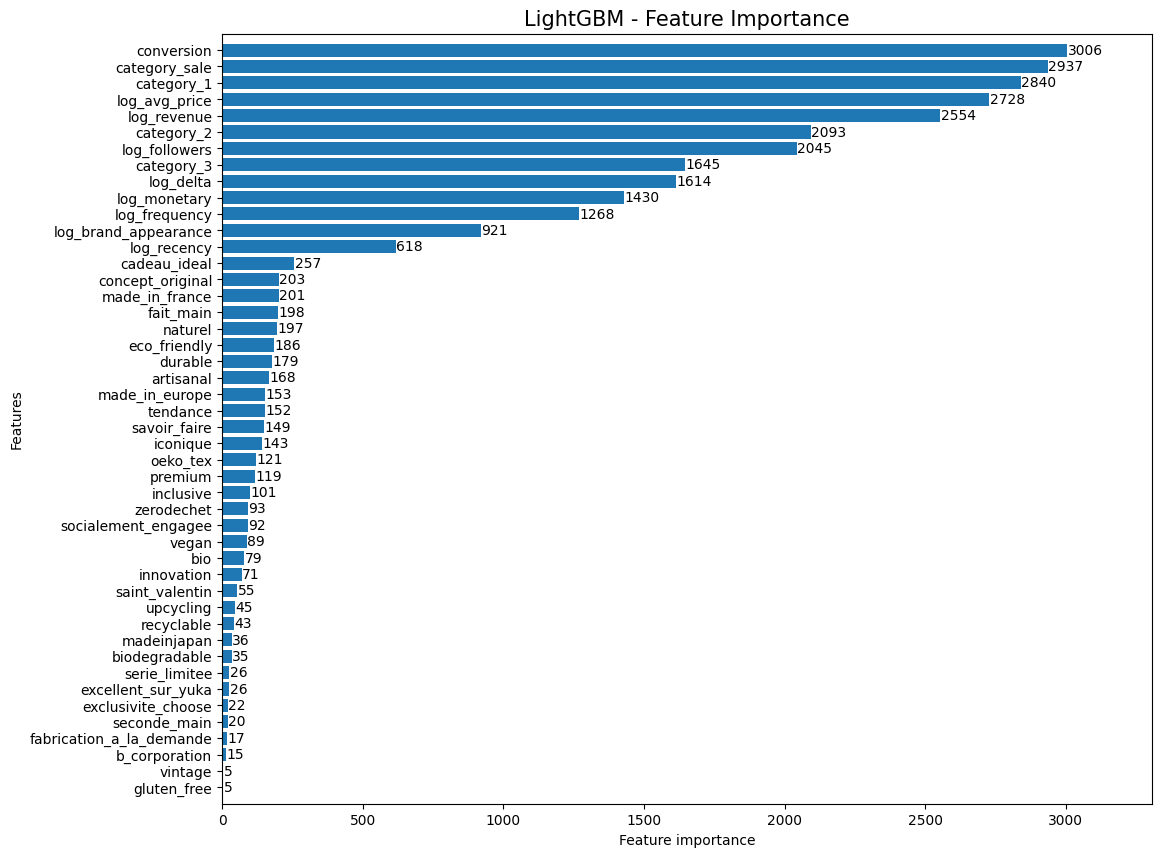

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()